## Libs

In [1]:
import matplotlib as matpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Using the Tensorflow backend (default).
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from tensorflow import set_random_seed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping

# advanced plotting
import seaborn as sns
plt.style.use('seaborn-darkgrid')
%matplotlib inline

Using TensorFlow backend.


## Data

In [2]:
%store -r data_VIG
data_VIG.head(2)

,Adj Close
Date,
2009-06-01,32.856422
2009-06-08,32.952915


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a483e4080>],
      dtype=object)

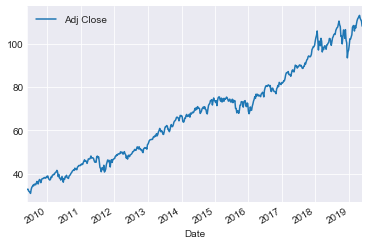

In [3]:
data_VIG.plot(subplots=True)

In [4]:
mm = MinMaxScaler(feature_range = (0,1))

In [5]:
dataset = mm.fit_transform(data_VIG)

In [6]:
#visualize a dataset[0:2]few data
dataset[0:2]

array([[0.02277466],
       [0.02395196]])

1 data every week. 52 data per year, 522 data in total.
* use the past 2 months (8 weeks) to predict 1 week ahead.
* create window of last 8 obs to train model
Parameters:
* history_size - size of past window
* target_size - how far in future model should learn to predict

6 years of training data = 313 weeks. 
Rest of the 209 weeks are for validation.

In [7]:
split = 0.6

train_size = int(len(dataset) * split)
#validation
test_size = len(dataset) - train_size

train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

print("training, test set: " + str((len(train), len(test))))

training, test set: (313, 209)


In [8]:
def input_dataset(dataset, window):
    data_X, data_y = [], []
    for i in range(len(dataset) - window - 1):
        a = dataset[i:(i + window), 0]
        data_X.append(a)
        data_y.append(dataset[i + window, 0])
    return(np.array(data_X), np.array(data_y))


In [9]:
# New testing and training sets for rolling forecast.
window = 1
train_X, train_Y = input_dataset(train, window)
test_X, test_Y = input_dataset(test, window)
print("Original train shape:")
print(train_X.shape)

# Reshape input data to match Keras format.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New train shape:")
print(train_X.shape)

Original train shape:
(311, 1)
New train shape:
(311, 1, 1)


## Univar Forecasting Model
* Part 1 - model will be given the last 4 obs and needs to learn to predict price in the next time step.

In [10]:
def fit_LSTM(train_X, train_Y, window = 1, neurons=128):
    set_random_seed(3)
    model = Sequential()
    
    model.add(LSTM(neurons, 
                   input_shape = (1, window)
                  ))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    earlyStop=EarlyStopping(monitor="val_loss",verbose=2,patience=15)
    model.fit(train_X, 
              train_Y, 
              epochs = 2000, 
              batch_size = 25,
              shuffle = False
             # verbose = 2
             )
    
    return(model)

# Fit the first model.
model1 = fit_LSTM(train_X, train_Y, window)

W0917 00:06:35.194442 4705785280 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0917 00:06:35.196979 4705785280 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0917 00:06:35.199712 4705785280 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0917 00:06:35.580411 4705785280 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0917 00:06:35.863474 4705785280 deprecation.py:323] From //anaconda3/li

Epoch 1/2000
311/311 [==============================] - 3s 10ms/step - loss: 0.0845
Epoch 2/2000
311/311 [==============================] - 0s 158us/step - loss: 0.0710
Epoch 3/2000
311/311 [==============================] - 0s 164us/step - loss: 0.0591
Epoch 4/2000
311/311 [==============================] - 0s 164us/step - loss: 0.0487
Epoch 5/2000
311/311 [==============================] - 0s 157us/step - loss: 0.0397
Epoch 6/2000
311/311 [==============================] - 0s 146us/step - loss: 0.0321
Epoch 7/2000
311/311 [==============================] - 0s 148us/step - loss: 0.0259
Epoch 8/2000
311/311 [==============================] - 0s 154us/step - loss: 0.0211
Epoch 9/2000
311/311 [==============================] - 0s 143us/step - loss: 0.0176
Epoch 10/2000
311/311 [==============================] - 0s 144us/step - loss: 0.0153
Epoch 11/2000
311/311 [==============================] - 0s 143us/step - loss: 0.0140
Epoch 12/2000
311/311 [==============================] - 0s 146u

311/311 [==============================] - 0s 121us/step - loss: 1.3402e-04
Epoch 186/2000
311/311 [==============================] - 0s 120us/step - loss: 1.3401e-04
Epoch 187/2000
311/311 [==============================] - 0s 120us/step - loss: 1.3400e-04
Epoch 188/2000
311/311 [==============================] - 0s 125us/step - loss: 1.3400e-04
Epoch 189/2000
311/311 [==============================] - 0s 118us/step - loss: 1.3399e-04
Epoch 190/2000
311/311 [==============================] - 0s 118us/step - loss: 1.3398e-04
Epoch 191/2000
311/311 [==============================] - 0s 119us/step - loss: 1.3398e-04
Epoch 192/2000
311/311 [==============================] - 0s 117us/step - loss: 1.3397e-04
Epoch 193/2000
311/311 [==============================] - 0s 118us/step - loss: 1.3396e-04
Epoch 194/2000
311/311 [==============================] - 0s 121us/step - loss: 1.3396e-04
Epoch 195/2000
311/311 [==============================] - 0s 120us/step - loss: 1.3395e-04
Epoch 196/2000

311/311 [==============================] - 0s 116us/step - loss: 1.3268e-04
Epoch 366/2000
311/311 [==============================] - 0s 123us/step - loss: 1.3267e-04
Epoch 367/2000
311/311 [==============================] - 0s 124us/step - loss: 1.3266e-04
Epoch 368/2000
311/311 [==============================] - 0s 120us/step - loss: 1.3265e-04
Epoch 369/2000
311/311 [==============================] - 0s 121us/step - loss: 1.3264e-04
Epoch 370/2000
311/311 [==============================] - 0s 117us/step - loss: 1.3263e-04
Epoch 371/2000
311/311 [==============================] - 0s 122us/step - loss: 1.3263e-04
Epoch 372/2000
311/311 [==============================] - 0s 119us/step - loss: 1.3262e-04
Epoch 373/2000
311/311 [==============================] - 0s 117us/step - loss: 1.3261e-04
Epoch 374/2000
311/311 [==============================] - 0s 119us/step - loss: 1.3260e-04
Epoch 375/2000
311/311 [==============================] - 0s 121us/step - loss: 1.3259e-04
Epoch 376/2000

311/311 [==============================] - 0s 120us/step - loss: 1.3088e-04
Epoch 546/2000
311/311 [==============================] - 0s 121us/step - loss: 1.3087e-04
Epoch 547/2000
311/311 [==============================] - 0s 122us/step - loss: 1.3086e-04
Epoch 548/2000
311/311 [==============================] - 0s 122us/step - loss: 1.3085e-04
Epoch 549/2000
311/311 [==============================] - 0s 119us/step - loss: 1.3084e-04
Epoch 550/2000
311/311 [==============================] - 0s 118us/step - loss: 1.3083e-04
Epoch 551/2000
311/311 [==============================] - 0s 121us/step - loss: 1.3082e-04
Epoch 552/2000
311/311 [==============================] - 0s 120us/step - loss: 1.3081e-04
Epoch 553/2000
311/311 [==============================] - 0s 124us/step - loss: 1.3080e-04
Epoch 554/2000
311/311 [==============================] - 0s 121us/step - loss: 1.3079e-04
Epoch 555/2000
311/311 [==============================] - 0s 122us/step - loss: 1.3078e-04
Epoch 556/2000

311/311 [==============================] - 0s 115us/step - loss: 1.2891e-04
Epoch 726/2000
311/311 [==============================] - 0s 114us/step - loss: 1.2890e-04
Epoch 727/2000
311/311 [==============================] - 0s 115us/step - loss: 1.2889e-04
Epoch 728/2000
311/311 [==============================] - 0s 116us/step - loss: 1.2888e-04
Epoch 729/2000
311/311 [==============================] - 0s 115us/step - loss: 1.2887e-04
Epoch 730/2000
311/311 [==============================] - 0s 113us/step - loss: 1.2886e-04
Epoch 731/2000
311/311 [==============================] - 0s 115us/step - loss: 1.2885e-04
Epoch 732/2000
311/311 [==============================] - 0s 122us/step - loss: 1.2884e-04
Epoch 733/2000
311/311 [==============================] - 0s 126us/step - loss: 1.2883e-04
Epoch 734/2000
311/311 [==============================] - 0s 125us/step - loss: 1.2882e-04
Epoch 735/2000
311/311 [==============================] - 0s 128us/step - loss: 1.2881e-04
Epoch 736/2000

311/311 [==============================] - 0s 110us/step - loss: 1.2729e-04
Epoch 906/2000
311/311 [==============================] - 0s 110us/step - loss: 1.2728e-04
Epoch 907/2000
311/311 [==============================] - 0s 132us/step - loss: 1.2727e-04
Epoch 908/2000
311/311 [==============================] - 0s 124us/step - loss: 1.2727e-04
Epoch 909/2000
311/311 [==============================] - 0s 113us/step - loss: 1.2726e-04
Epoch 910/2000
311/311 [==============================] - 0s 113us/step - loss: 1.2725e-04
Epoch 911/2000
311/311 [==============================] - 0s 112us/step - loss: 1.2725e-04
Epoch 912/2000
311/311 [==============================] - 0s 110us/step - loss: 1.2724e-04
Epoch 913/2000
311/311 [==============================] - 0s 110us/step - loss: 1.2723e-04
Epoch 914/2000
311/311 [==============================] - 0s 112us/step - loss: 1.2723e-04
Epoch 915/2000
311/311 [==============================] - 0s 112us/step - loss: 1.2722e-04
Epoch 916/2000

311/311 [==============================] - 0s 119us/step - loss: 1.2662e-04
Epoch 1085/2000
311/311 [==============================] - 0s 116us/step - loss: 1.2662e-04
Epoch 1086/2000
311/311 [==============================] - 0s 121us/step - loss: 1.2662e-04
Epoch 1087/2000
311/311 [==============================] - 0s 119us/step - loss: 1.2662e-04
Epoch 1088/2000
311/311 [==============================] - 0s 144us/step - loss: 1.2662e-04
Epoch 1089/2000
311/311 [==============================] - 0s 141us/step - loss: 1.2662e-04
Epoch 1090/2000
311/311 [==============================] - 0s 185us/step - loss: 1.2662e-04
Epoch 1091/2000
311/311 [==============================] - 0s 136us/step - loss: 1.2661e-04
Epoch 1092/2000
311/311 [==============================] - 0s 137us/step - loss: 1.2661e-04
Epoch 1093/2000
311/311 [==============================] - 0s 131us/step - loss: 1.2661e-04
Epoch 1094/2000
311/311 [==============================] - 0s 141us/step - loss: 1.2661e-04
Epoc

311/311 [==============================] - 0s 114us/step - loss: 1.2672e-04
Epoch 1263/2000
311/311 [==============================] - 0s 116us/step - loss: 1.2672e-04
Epoch 1264/2000
311/311 [==============================] - 0s 118us/step - loss: 1.2673e-04
Epoch 1265/2000
311/311 [==============================] - 0s 115us/step - loss: 1.2672e-04
Epoch 1266/2000
311/311 [==============================] - 0s 121us/step - loss: 1.2673e-04
Epoch 1267/2000
311/311 [==============================] - 0s 128us/step - loss: 1.2672e-04
Epoch 1268/2000
311/311 [==============================] - 0s 122us/step - loss: 1.2673e-04
Epoch 1269/2000
311/311 [==============================] - 0s 120us/step - loss: 1.2672e-04
Epoch 1270/2000
311/311 [==============================] - 0s 122us/step - loss: 1.2673e-04
Epoch 1271/2000
311/311 [==============================] - 0s 120us/step - loss: 1.2673e-04
Epoch 1272/2000
311/311 [==============================] - 0s 124us/step - loss: 1.2673e-04
Epoc

311/311 [==============================] - 0s 113us/step - loss: 1.2690e-04
Epoch 1441/2000
311/311 [==============================] - 0s 114us/step - loss: 1.2690e-04
Epoch 1442/2000
311/311 [==============================] - 0s 115us/step - loss: 1.2690e-04
Epoch 1443/2000
311/311 [==============================] - 0s 115us/step - loss: 1.2690e-04
Epoch 1444/2000
311/311 [==============================] - 0s 111us/step - loss: 1.2690e-04
Epoch 1445/2000
311/311 [==============================] - 0s 113us/step - loss: 1.2690e-04
Epoch 1446/2000
311/311 [==============================] - 0s 110us/step - loss: 1.2690e-04
Epoch 1447/2000
311/311 [==============================] - 0s 111us/step - loss: 1.2690e-04
Epoch 1448/2000
311/311 [==============================] - 0s 113us/step - loss: 1.2690e-04
Epoch 1449/2000
311/311 [==============================] - 0s 117us/step - loss: 1.2691e-04
Epoch 1450/2000
311/311 [==============================] - 0s 116us/step - loss: 1.2691e-04
Epoc

311/311 [==============================] - 0s 108us/step - loss: 1.2687e-04
Epoch 1619/2000
311/311 [==============================] - 0s 109us/step - loss: 1.2686e-04
Epoch 1620/2000
311/311 [==============================] - 0s 110us/step - loss: 1.2686e-04
Epoch 1621/2000
311/311 [==============================] - 0s 110us/step - loss: 1.2687e-04
Epoch 1622/2000
311/311 [==============================] - 0s 110us/step - loss: 1.2687e-04
Epoch 1623/2000
311/311 [==============================] - 0s 110us/step - loss: 1.2687e-04
Epoch 1624/2000
311/311 [==============================] - 0s 111us/step - loss: 1.2687e-04
Epoch 1625/2000
311/311 [==============================] - 0s 109us/step - loss: 1.2687e-04
Epoch 1626/2000
311/311 [==============================] - 0s 111us/step - loss: 1.2687e-04
Epoch 1627/2000
311/311 [==============================] - 0s 111us/step - loss: 1.2688e-04
Epoch 1628/2000
311/311 [==============================] - 0s 110us/step - loss: 1.2688e-04
Epoc

311/311 [==============================] - 0s 118us/step - loss: 1.2690e-04
Epoch 1797/2000
311/311 [==============================] - 0s 116us/step - loss: 1.2690e-04
Epoch 1798/2000
311/311 [==============================] - 0s 111us/step - loss: 1.2690e-04
Epoch 1799/2000
311/311 [==============================] - 0s 111us/step - loss: 1.2690e-04
Epoch 1800/2000
311/311 [==============================] - 0s 110us/step - loss: 1.2690e-04
Epoch 1801/2000
311/311 [==============================] - 0s 111us/step - loss: 1.2690e-04
Epoch 1802/2000
311/311 [==============================] - 0s 113us/step - loss: 1.2690e-04
Epoch 1803/2000
311/311 [==============================] - 0s 113us/step - loss: 1.2690e-04
Epoch 1804/2000
311/311 [==============================] - 0s 114us/step - loss: 1.2691e-04
Epoch 1805/2000
311/311 [==============================] - 0s 112us/step - loss: 1.2691e-04
Epoch 1806/2000
311/311 [==============================] - 0s 117us/step - loss: 1.2691e-04
Epoc

311/311 [==============================] - 0s 119us/step - loss: 1.2691e-04
Epoch 1975/2000
311/311 [==============================] - 0s 123us/step - loss: 1.2692e-04
Epoch 1976/2000
311/311 [==============================] - 0s 118us/step - loss: 1.2692e-04
Epoch 1977/2000
311/311 [==============================] - 0s 117us/step - loss: 1.2692e-04
Epoch 1978/2000
311/311 [==============================] - 0s 121us/step - loss: 1.2692e-04
Epoch 1979/2000
311/311 [==============================] - 0s 122us/step - loss: 1.2692e-04
Epoch 1980/2000
311/311 [==============================] - 0s 120us/step - loss: 1.2692e-04
Epoch 1981/2000
311/311 [==============================] - 0s 124us/step - loss: 1.2692e-04
Epoch 1982/2000
311/311 [==============================] - 0s 119us/step - loss: 1.2692e-04
Epoch 1983/2000
311/311 [==============================] - 0s 112us/step - loss: 1.2693e-04
Epoch 1984/2000
311/311 [==============================] - 0s 114us/step - loss: 1.2693e-04
Epoc

## Results 
### Predictions and model evaluations
The advantage of using the RMSE is that it's in the same unit as the original data, i.e. price/wk (1.000 passengers / month in Kaggle example).

In [11]:
def prediction_score(model, X, Y):
    # Make predictions using input data
    pred = mm.inverse_transform(model.predict(X))
    # Show Y on original scale
    original_data = mm.inverse_transform([Y])
    # RMSE.
    score = math.sqrt(mean_squared_error(original_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_pred = prediction_score(model1, train_X, train_Y)
rmse_test, test_pred = prediction_score(model1, test_X, test_Y)

print("Training score: %.2f RMSE" % rmse_train)
print("Testing score: %.2f RMSE" % rmse_test)

Training score: 0.92 RMSE
Testing score: 1.59 RMSE


### Plotting and comparing original data, predictions, forecasts

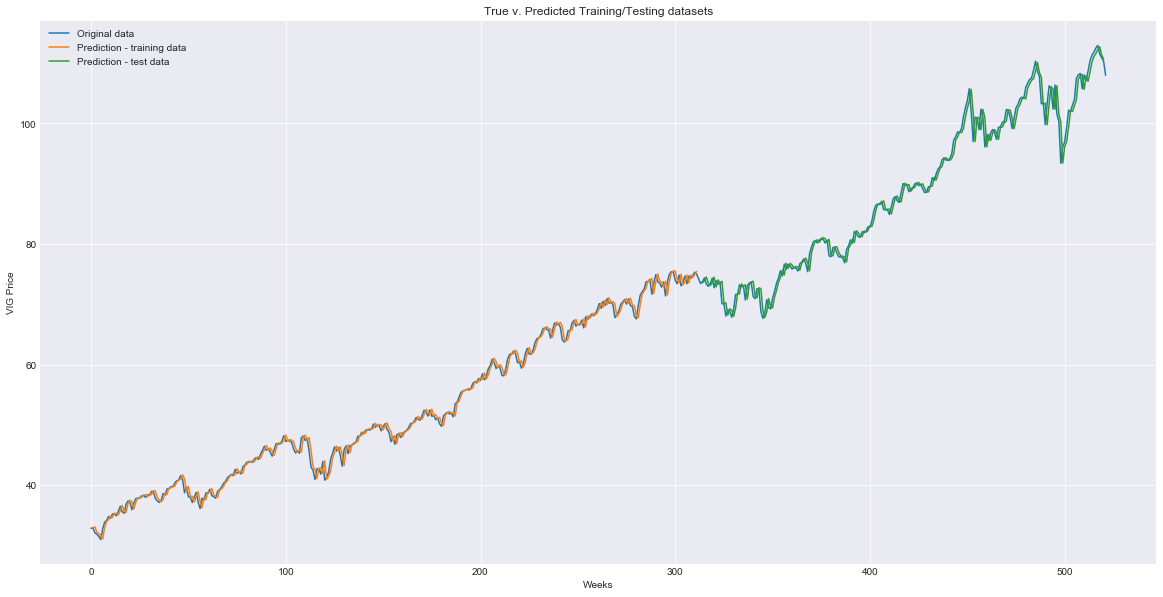

In [12]:
# Train predictions
train_pred_plot = np.empty_like(dataset)
train_pred_plot[:, :] = np.nan
train_pred_plot[window:len(train_pred) + window, :] = train_pred

# Test predictions
test_pred_plot = np.empty_like(dataset)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_pred) + (window * 2) + 1:len(dataset) - 1, :] = test_pred

#plot
plt.figure(figsize = (20, 10))
plt.plot(mm.inverse_transform(dataset), label = 'Original data')
plt.plot(train_pred_plot, label = 'Prediction - training data')
plt.plot(test_pred_plot, label = 'Prediction - test data')
plt.xlabel('Weeks')
plt.ylabel('VIG Price')
plt.title('True v. Predicted Training/Testing datasets')
plt.legend()
plt.show()

In [14]:
LSTM_pred_VIG = pd.DataFrame(test_pred)
%store LSTM_pred_VIG

Stored 'LSTM_pred_VIG' (DataFrame)
